<a href="https://colab.research.google.com/github/Rizzshen/AiGoogleCollab/blob/main/Worksheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
import io

print("Please upload your 'bank.csv' file:")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print("\nFirst 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame info:")
print(df.info())

object_cols = df.select_dtypes(include='object').columns
print("\nColumns with object dtype:")
print(object_cols)

print("\nUnique values of object columns (showing first 10 values each):")
for col in object_cols:
    print(f"Column '{col}': {df[col].unique()[:10]}")
    print()

print("Null values in each column:")
print(df.isnull().sum())

df_numeric = df.select_dtypes(exclude='object')

df_numeric.to_csv('banknumericdata.csv', index=False)
print("\nNumeric data saved as 'banknumericdata.csv'")

df_numeric_read = pd.read_csv('banknumericdata.csv')
print("\nSummary statistics of numeric data:")
print(df_numeric_read.describe())



Please upload your 'bank.csv' file:


Saving bank.csv to bank.csv

First 5 rows of the DataFrame:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

DataFrame info:
<class 'pandas.core.frame.DataFram

In [2]:
#Problem 2
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("medical_students_dataset.csv")

print(df.info())
print(df.isnull().sum())

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

mean_cols = ['Age', 'Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate']
for c in mean_cols:
    df[c] = df[c].fillna(df[c].mean())


median_cols = ['Cholesterol', 'Blood Pressure']
for c in median_cols:
    df[c] = df[c].fillna(df[c].median())
for c in categorical_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

print("\nMissing values after imputation:")
print(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("Rows after removing duplicates:", len(df))



Saving medical_students_dataset.csv to medical_students_dataset.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None
Student ID        20000
Age               20000
Gender            20000
H

In [3]:
#3.2
#Problem 1
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv("Titanic-Dataset.csv")

columns_needed = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']
subset_df = df[columns_needed]
first_class_df = subset_df[subset_df['Pclass'] == 1]

mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()

print(mean_fare)
print(median_fare)
print(max_fare)
print(min_fare)


Saving Titanic-Dataset.csv to Titanic-Dataset.csv
84.1546875
60.287499999999994
512.3292
0.0


In [4]:
#3.2
#Problem 2
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv("Titanic-Dataset.csv")

subset_df = df[['Name','Pclass','Sex','Age','Fare','Survived']]
first_class_df = subset_df[subset_df['Pclass'] == 1]

null_age = first_class_df['Age'].isnull().sum()
print(null_age)

first_class_df = first_class_df.dropna(subset=['Age'])
first_class_df.head()

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv
30


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


In [5]:

#3.2
#Problem 3
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv("Titanic-Dataset.csv")

encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, encoded], axis=1)
df = df.drop(columns=['Embarked'])

print(df.head())

Saving Titanic-Dataset.csv to Titanic-Dataset (2).csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282

Saving Titanic-Dataset.csv to Titanic-Dataset (3).csv
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


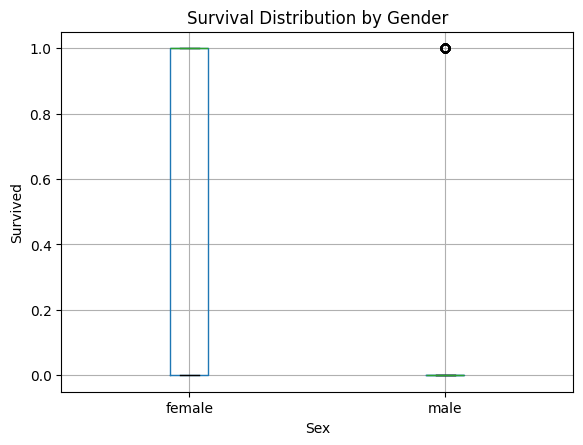

In [6]:
#3.2
#Problem 4
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Titanic-Dataset.csv")

mean_survival = df.groupby('Sex')['Survived'].mean()
print(mean_survival)

df.boxplot(column='Survived', by='Sex')
plt.title("Survival Distribution by Gender")
plt.suptitle("")
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.show()


Saving Titanic-Dataset.csv to Titanic-Dataset (4).csv


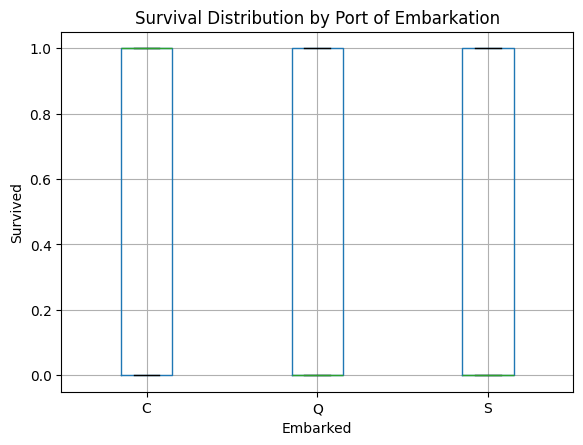

In [7]:

#3.2
#Problem 5
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Titanic-Dataset.csv")

df.boxplot(column='Survived', by='Embarked')
plt.title("Survival Distribution by Port of Embarkation")
plt.suptitle("")
plt.xlabel("Embarked")
plt.ylabel("Survived")
plt.show()



Saving Titanic-Dataset.csv to Titanic-Dataset (5).csv
Pclass  AgeGroup     
1       (0.419, 19.0]    0.809524
        (19.0, 25.0]     0.761905
        (25.0, 31.8]     0.666667
        (31.8, 41.0]     0.777778
        (41.0, 80.0]     0.506667
2       (0.419, 19.0]    0.742857
        (19.0, 25.0]     0.400000
        (25.0, 31.8]     0.416667
        (31.8, 41.0]     0.461538
        (41.0, 80.0]     0.363636
3       (0.419, 19.0]    0.333333
        (19.0, 25.0]     0.197674
        (25.0, 31.8]     0.283582
        (31.8, 41.0]     0.166667
        (41.0, 80.0]     0.088235
Name: Survived, dtype: float64


/tmp/ipython-input-1930280250.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Pclass','AgeGroup'])['Survived'].mean()


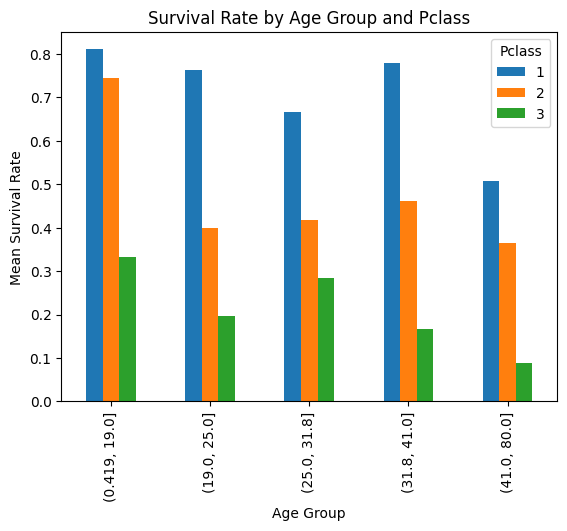

In [8]:

#3.2
#Problem 5
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Titanic-Dataset.csv")

df['AgeGroup'] = pd.qcut(df['Age'], 5)

grouped = df.groupby(['Pclass','AgeGroup'])['Survived'].mean()
print(grouped)

pivot = grouped.unstack(level=0)

pivot.plot(kind='bar')
plt.xlabel("Age Group")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Age Group and Pclass")
plt.legend(title="Pclass")
plt.show()